# 📊 ANALYSIS OF UK MAJOR ACCIDENTS OCCURRED IN 2020 AND POSSIBLE SOLUTIONS 

<sub><sup>
Author:	Mauro (xcibe95x) Leoci
    <br>Language: Python, Most of the code is hidden on that notebook to make it easier to read.
    <br>Output: Html
    <br>About: I'm making this with no prior python knowledge because I need some hot curry rice🍛 and it's a great opportunity to understand python and data science.
This platform is perfect for this as one day I would like to gain enough knowledge to use machine learning on little to human size robots.
</sub></sup>

💾 *Data provided by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data*

🥡 *Contains public sector information licensed under the Open Government Licence v3.0.*

# 🚔 Summary 
Reducing traffic accidents is an essential public safety challenge, therefore accident analysis has been a recurring subject of research in recent decades. 

The objective of this project is to analyze the data of UK accidents that occurred in 2020 provided by the department for transport, in order to prevent or reduce the causes of these accidents in specific areas.

Relevant data has been selected by hand before being analyzed further in phyton and has been simplified for anyone to understand. 
The significant findings in this analysis show us that travelling in the evening is dangerous, whereas Monday is the safest day to do so.
They also provide us with helpful information for narrowing down the causes of incidents and trying to prevent them.

In [23]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

### Dataframe
Making the provided data into a data frame, we can take a quick look at the accidents total, counting <b>91199 Total Accidents</b>

In [24]:
# Color Palette
sns.set_theme(style='darkgrid')
rainbow = sns.color_palette('hls', 7)

# Convert Time Table Format
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

# Import the Casualties DataFrame
casualties_df = pd.read_csv(r'./data/casualty_data.csv')

# Import the Accident DataFrame
data_df = pd.read_csv(r'./data/accident_data.csv')
print(f"Raw data provided by the department for transport, counting {data_df.shape[0]} total accidents.")
data_df.head()

Raw data provided by the department for transport, counting 91199 total accidents.


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [25]:
print("Casualties data provided by the department for transport.")
casualties_df.head()

Casualties data provided by the department for transport.


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


### Dataframe Cleanup
Before starting to analyze the data further, it's necessary to clean it up from unwanted tables and null values aswell as constructing a dataframe filtered only with major accidents, as we can see we now have a total of <b>202 Major Accidents</b> 

In [26]:
# Data Cleanup
# Remove Blank Columns
data_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

# Remove Unokwn Values
data_df.replace('Unknown', np.nan, inplace=True)
# Filtering data
data_df['hour_of_day'] = data_df['time'].apply(to_hour)

# Filter out some usless data for making a Correlation Matrix
matrix_df=data_df
cols = [0,2,3,4,5,6]
matrix_df.drop(matrix_df.columns[cols],axis=1,inplace=True)

# Make a new clean table with only the required data
accidents_df=pd.DataFrame(data=data_df,columns=['time','date', 'day_of_week','accident_severity','number_of_casualties','hour_of_day', 'urban_or_rural_area', 'road_type', 'speed_limit', 'light_conditions', 'weather_conditions'])

In [27]:
# Since the safety team classify major accidents as fatal accidents involving 3+ casualties
# We filter our DataFrames According to it
normal_accidents_df=accidents_df[accidents_df.accident_severity > 1]
normal_accidents_df=normal_accidents_df[normal_accidents_df.number_of_casualties <= 3]
severe_accidents_df=accidents_df[accidents_df.accident_severity == 1]
major_accidents_df=severe_accidents_df[severe_accidents_df.number_of_casualties >= 3]


In [28]:

print(f"Major Accidents data counting {major_accidents_df.shape[0]} accidents in 2020")
major_accidents_df.head()

Major Accidents data counting 202 accidents in 2020


,time,date,day_of_week,accident_severity,number_of_casualties,hour_of_day,urban_or_rural_area,road_type,speed_limit,light_conditions,weather_conditions
3102,13:17,20/02/2020,5,1,11,13,1,6,30,1,8
3583,05:13,29/02/2020,7,1,3,5,2,1,50,6,2
19652,22:26,10/12/2020,5,1,4,22,1,3,30,4,1
21148,12:11,15/06/2020,2,1,3,12,2,6,60,1,1
21166,14:20,21/06/2020,1,1,4,14,2,6,40,1,1


# 🚦 Accidents Analysis
### Correlation Matrix
Running a correlation matrix by filtering out some informations gives us a first glimpse at the data. However in this case it does not give us any significance on why major accidents are happening so we are going to analyze the data further in specific areas.

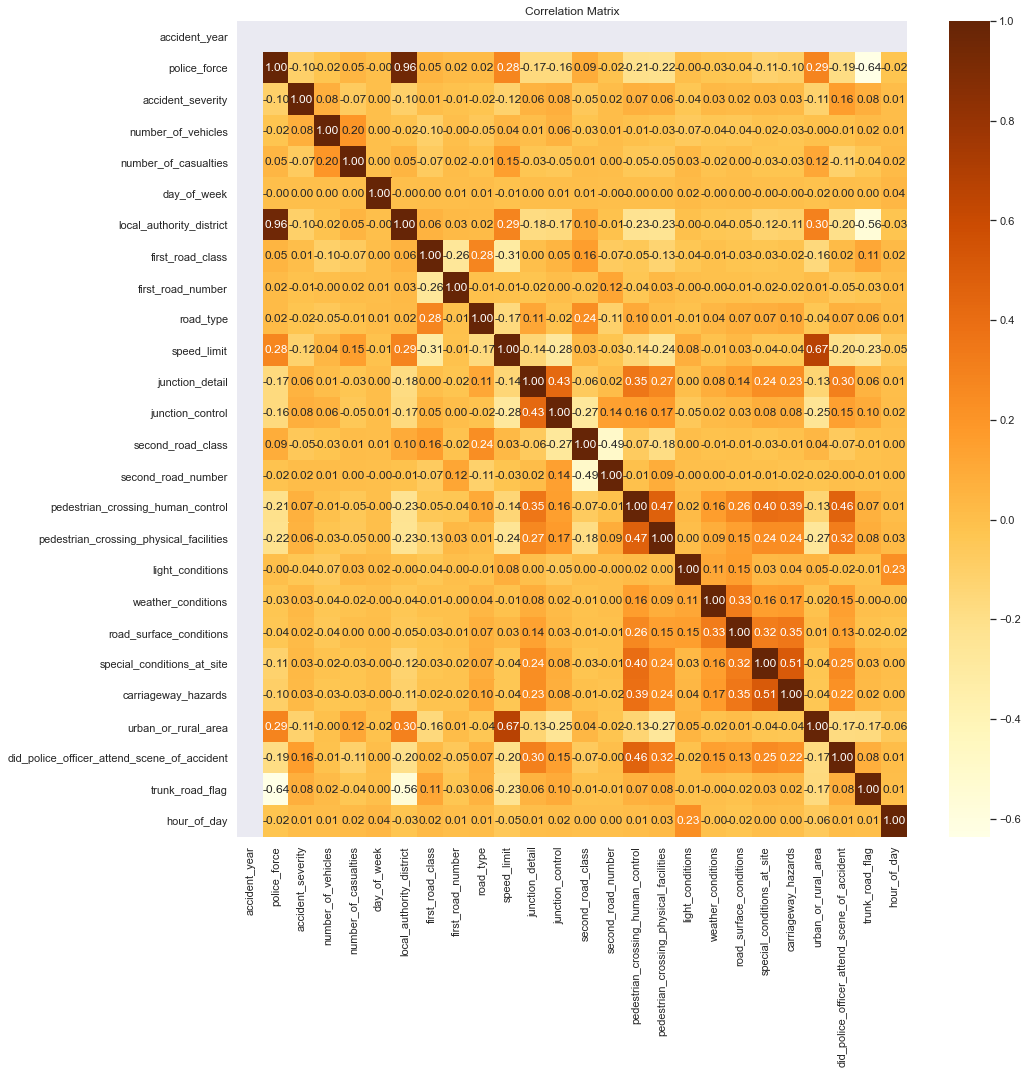

In [29]:
# Correlation of numerical attributes
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(matrix_df.corr(), annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

### Trend of Accidents by Day of Week
Analyzing the data from a day of the week perspective we can observe that all <b>major accidents</b> occurred on <b>Saturday</b>, we can also see that Monday proves to be the safest day for travelling.

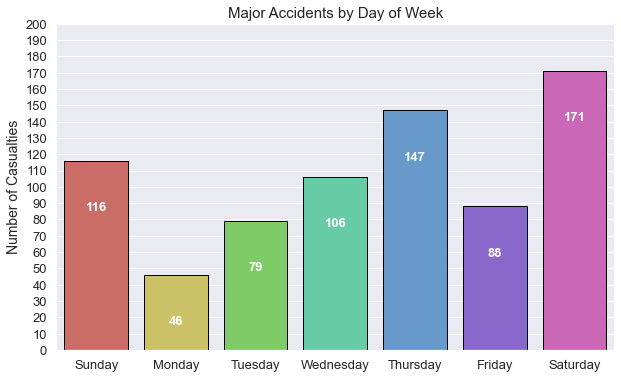

In [30]:
# Filter Data for Major Casualties by Day of Week
accidents_by_week = major_accidents_df.groupby(['day_of_week']).sum()['number_of_casualties'].to_frame().reset_index()

# Show Casualties Values on Bars
plt.figure(figsize=(10,6))
b_values = sns.barplot(x='day_of_week', y='number_of_casualties', data=accidents_by_week,
palette=rainbow, edgecolor='black', linewidth=1)
x_axis = np.arange(0,7,1)
# Calculate upper bound of y-axis
y_max = max(accidents_by_week['number_of_casualties'])
y_max -= y_max % -50
step = 10
y_axis = np.arange(0, y_max+step, step)
y_axis_fmt = ["{:.0f}".format(y) for y in y_axis]
plt.ylim(min(y_axis), max(y_axis))
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=14)

# Add Data Labels for bar values
ax = b_values.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-30)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=13) 
plt.title('Major Accidents by Day of Week', fontsize=15)
plt.show()

###  Trend of Accidents by Hour
As shown by an hourly report of casualties, peak hours of the accidents tend to focus on the <b>evening</b>, registering the highest number of deaths in that time frame. From this graph, we can consider that travelling early in the morning is a little bit safer.

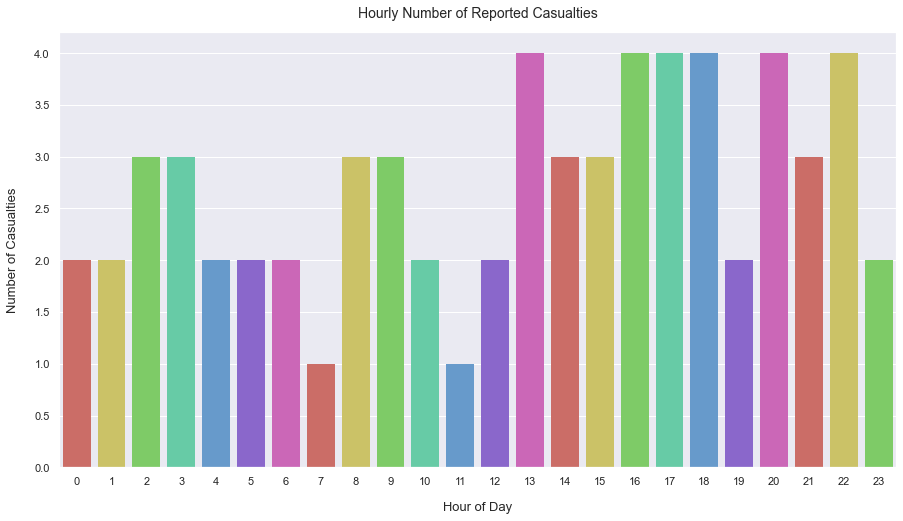

In [31]:
# Plot number of casualties by hour of day
plt.figure(figsize=(15,8))
s = sns.barplot(data=major_accidents_df.groupby('hour_of_day')['number_of_casualties'].nunique().reset_index(), x='hour_of_day', y='number_of_casualties', palette=rainbow, linewidth=0)
s.set_title('Hourly Number of Reported Casualties', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Casualties', fontsize=13, labelpad=15)
plt.show()

###  Recurring Patterns between time of day and day of the week
By taking the above information in count we now know the time and day major accidents are occurring, making it possible to analyze the data altogether. We now have a pattern in major accidents for each day of the week that tends to focus on the evening and a confirmation that Monday is indeed the safest day for travelling.


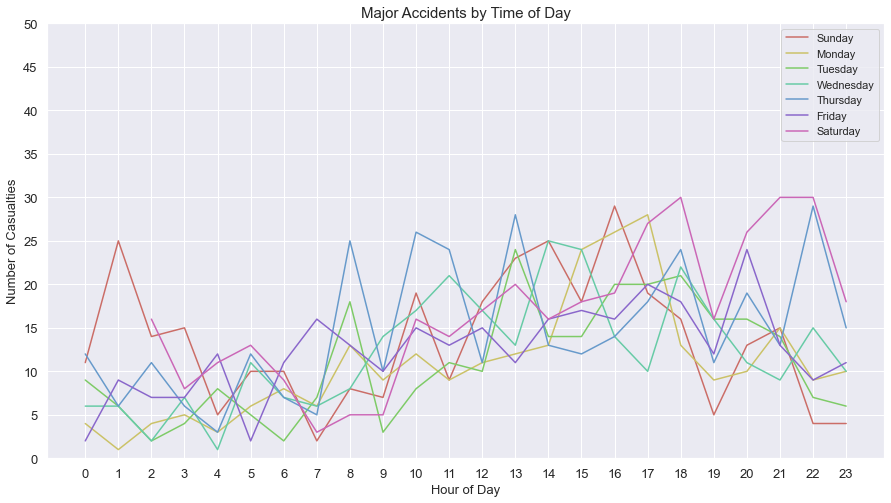

In [32]:
# Trends by Time of Day and Number of Casualties 
accidents_by_hour = severe_accidents_df.groupby(['day_of_week','hour_of_day']).sum()['number_of_casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['number_of_casualties'], 
index=['hour_of_day'], columns=['day_of_week'])
# Trends by Time of Day and Number of Casualties 
accidents_by_hour = severe_accidents_df.groupby(['day_of_week','hour_of_day']).sum()['number_of_casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['number_of_casualties'], 
index=['hour_of_day'], columns=['day_of_week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

x_axis = accidents_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(15,8))
plt.plot(x_axis, accidents_by_hour_pivot['Sunday'], color='#CB6D67', label='Sunday')
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='#CBC267', label='Monday')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='#7ECB67' , label='Tuesday')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='#67CBA6', label='Wednesday')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='#679ACB', label='Thursday')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='#8A67CB', label='Friday')
plt.plot(x_axis, accidents_by_hour_pivot['Saturday'], color='#CB67B7', label='Saturday')

# Determine y-axis
y_max = 50
step = 5
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=11, loc='upper right')
plt.title("Major Accidents by Time of Day", fontsize=15)
plt.show()


<b>Further Patterns Analysis</b><br>
Using the same technique we can isolate Saturday to verify that the accidents are focusing between <b>18 PM to 22 PM</b>, making it easier to apply prevention measures and police force controls based on a time factor.

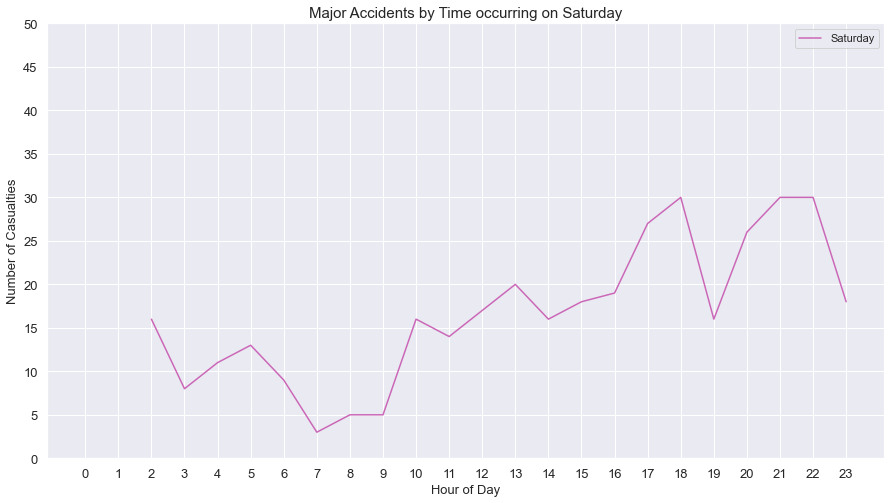

In [33]:
# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(15,8))
plt.plot(x_axis, accidents_by_hour_pivot['Saturday'], color='#CB67B7', label='Saturday')

# Determine y-axis
y_max = 50
step = 5
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=11, loc='upper right')
plt.title("Major Accidents by Time occurring on Saturday", fontsize=15)
plt.show()


# 🚧 Characteristics Case Study
We now have an idea of the possible preventive measures that could be applied. 

However, before drawing any premature conclusion, we can still analyze the data by the severity of the accidents to see what characteristics are distinguishing the accidents so we can have a better view of what's going on and apply real security measures that can save lives.

### Speed Limit

The majority of accidents is happening around <b>30 Mph</b>, while all the major accidents are happening at <b>60 Mph</b>. Since we can't certainly tell if there has been speeding from this information, we can consider lowering the Speed Limit on areas with the most major accidents.


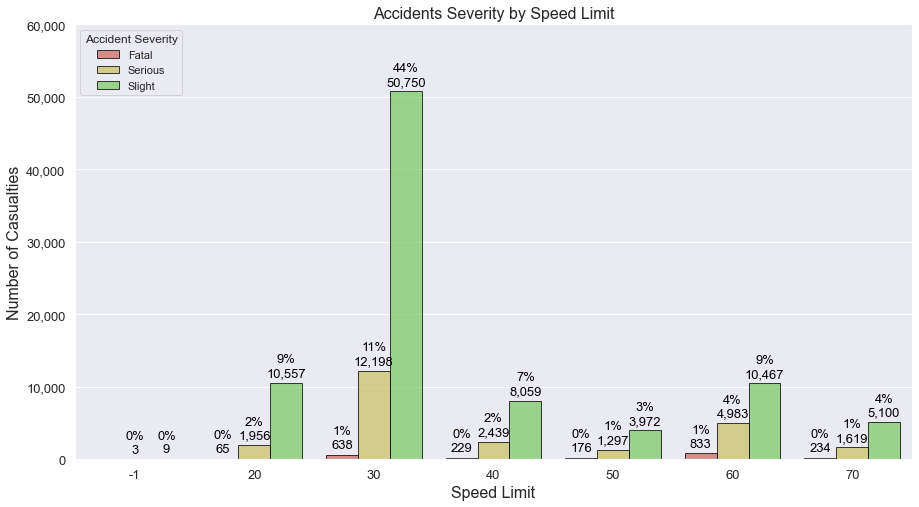

In [34]:
# Create Dataframe
speed_accidents = data_df.groupby(['speed_limit',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()
total_casualties = speed_accidents['number_of_casualties'].sum()

plt.figure(figsize=(15,8))
# Determine y-axis
y_max = max(speed_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
g = sns.barplot(x='speed_limit', y='number_of_casualties', hue='accident_severity', data=speed_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)
ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  
# Set legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True) 
plt.xlabel('Speed Limit', fontsize=16)
plt.ylabel('Number of Casualties', fontsize=16)
plt.title('Accidents Severity by Speed Limit', fontsize=16)
plt.show()

### Light Conditions
Most of the accidents are occurring when there's still <b>daylight</b>. Since in this graph we are examinating accidents by severity, checking whether it's the same for major accidents returns us with 121 major accidents during daylight. However there are still 45 accidents with no light conditions at all, meaning that we can still prevent the amount of accidents by localizing this areas and adding improved lighting.

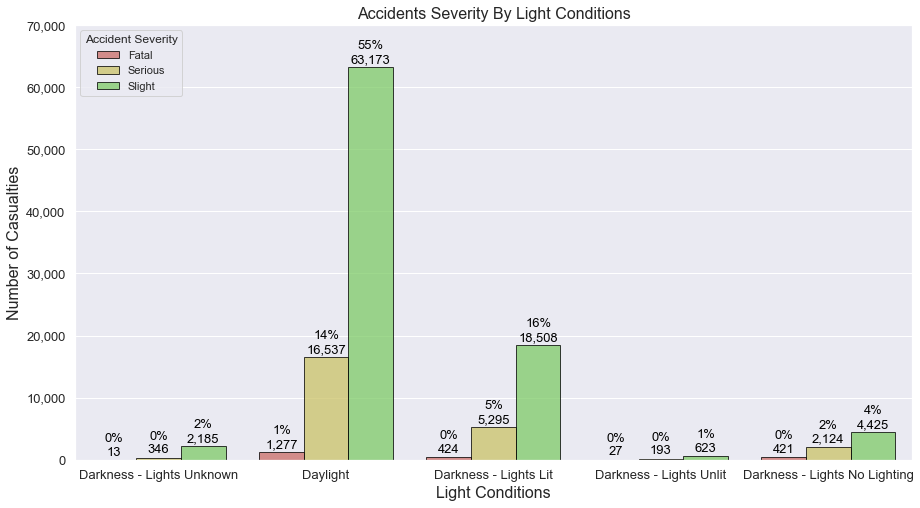

In [35]:
# Create Dataframe
lightc_accidents = data_df.groupby(['light_conditions',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()
total_casualties = speed_accidents['number_of_casualties'].sum()

# 
lightc_accidents['light_conditions'] = [str('Daylight') if value==1 else str('Darkness - Lights Lit') if value==4 else str('Darkness - Lights Unlit') if value==5 else str('Darkness - Lights No Lighting') if value==6 else str('Darkness - Lights Unknown') 
                                         for value in lightc_accidents['light_conditions']]

plt.figure(figsize=(15,8))
# Determine y-axis
y_max = max(lightc_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))
# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='light_conditions', y='number_of_casualties', hue='accident_severity', data=lightc_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.xlabel('Light Conditions', fontsize=16)
plt.ylabel('Number of Casualties', fontsize=16)
plt.title('Accidents Severity By Light Conditions', fontsize=16)
plt.show()

In [36]:
lightMA_df=accidents_df[accidents_df.accident_severity == 1]
lightMA_df=lightMA_df[lightMA_df.number_of_casualties >= 3]
lightMA_day=lightMA_df[lightMA_df.light_conditions == 1]
lightMA_lit=lightMA_df[lightMA_df.light_conditions == 4]
lightMA_unlit=lightMA_df[lightMA_df.light_conditions == 5]
lightMA_no=lightMA_df[lightMA_df.light_conditions == 6]
print(f"Major Accidents Occurred During Daylight ({lightMA_day.shape[0]})")
print(f"Major Accidents Occurred with Lit Lights ({lightMA_lit.shape[0]})")
print(f"Major Accidents Occurred with Unlit Lights ({lightMA_unlit.shape[0]})")
print(f"Major Accidents Occurred with No Light at all ({lightMA_no.shape[0]})")

Major Accidents Occurred During Daylight (121)
Major Accidents Occurred with Lit Lights (34)
Major Accidents Occurred with Unlit Lights (2)
Major Accidents Occurred with No Light at all (45)


### Weather Conditions
In any of the cases the weather seems not to be concerning given that most of the accidents resulted to occur with fine weather and with no high winds.

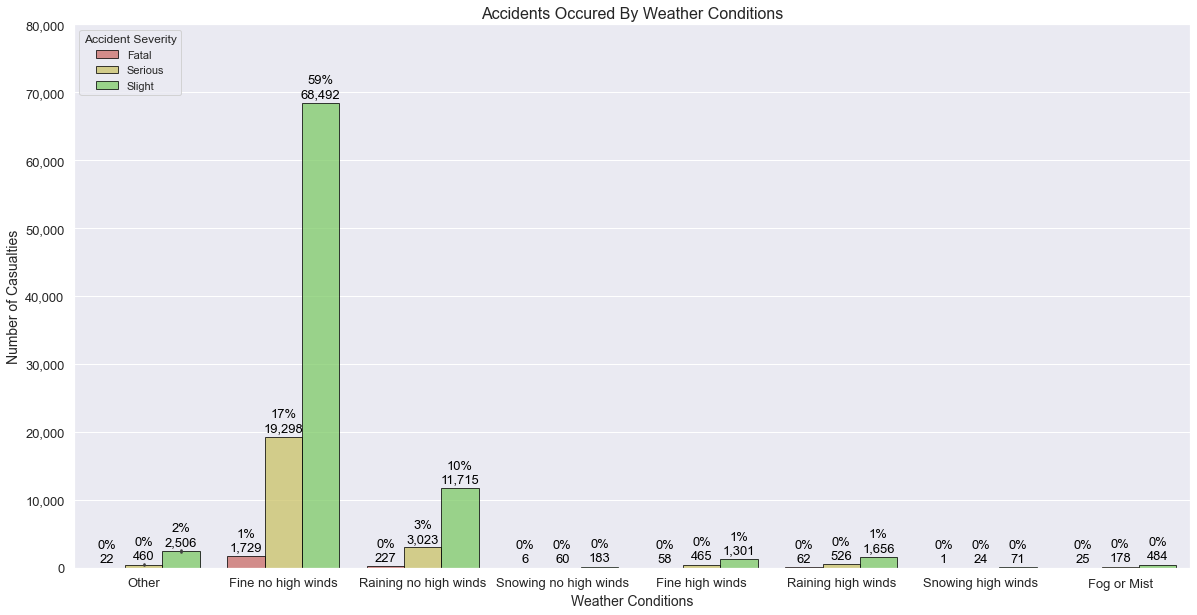

In [37]:
# Create Dataframe
weather_accidents = data_df.groupby(['weather_conditions',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = weather_accidents['number_of_casualties'].sum()

# 
weather_accidents['weather_conditions'] = [str('Fine no high winds') if value==1 else str('Raining no high winds') if value==2 else str('Snowing no high winds') if value==3 else str('Fine high winds') if value==4 else str('Raining high winds') if value==5 else str('Snowing high winds') if value==6 else str('Fog or Mist') if value==7 else str('Other')
                                         for value in weather_accidents['weather_conditions']]

plt.figure(figsize=(20,10))

# Determine y-axis
y_max = max(weather_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='weather_conditions', y='number_of_casualties', hue='accident_severity', data=weather_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents Occured By Weather Conditions', fontsize=16)
plt.show()

### Road Conditions Surface
Likewise here, the road conditions appear not to have an impact in major accidents, but we can notice there has been a good amount of accidents on wet or damp roads. Most of them however happen on dry roads, so it looks like a pretty normal situation.

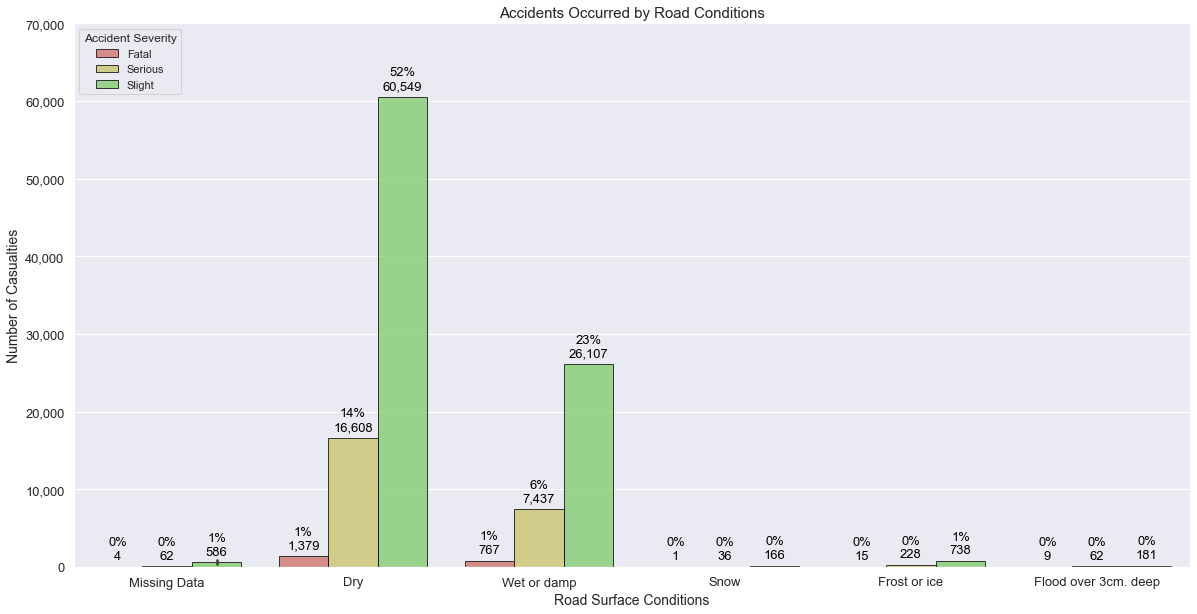

In [38]:
# Create Dataframe
roadcond_accidents = data_df.groupby(['road_surface_conditions',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = roadcond_accidents['number_of_casualties'].sum()

# 
roadcond_accidents['road_surface_conditions'] = [str('Dry') if value==1 else str('Wet or damp') if value==2 else str('Snow') if value==3 else str('Frost or ice') if value==4 else str('Flood over 3cm. deep') if value==5 else str('Oil or diesel') if value==6 else str('Mud') if value==7 else str('Missing Data')
                                         for value in roadcond_accidents['road_surface_conditions']]

plt.figure(figsize=(20,10))

# Determine y-axis
y_max = max(roadcond_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='road_surface_conditions', y='number_of_casualties', hue='accident_severity', data=roadcond_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('Road Surface Conditions', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents Occurred by Road Conditions', fontsize=15)
plt.show()

### Road Type
Most of the accidents appear to be focused on Single Carriageway roads, this can tell us that the majority of the accidents are probably frontal crashes in the case of a dual lanes road, in this case, if it is possible could be a good idea to expand the road to four lanes or reduce the speed limit, and add speed limiters on the road itself.

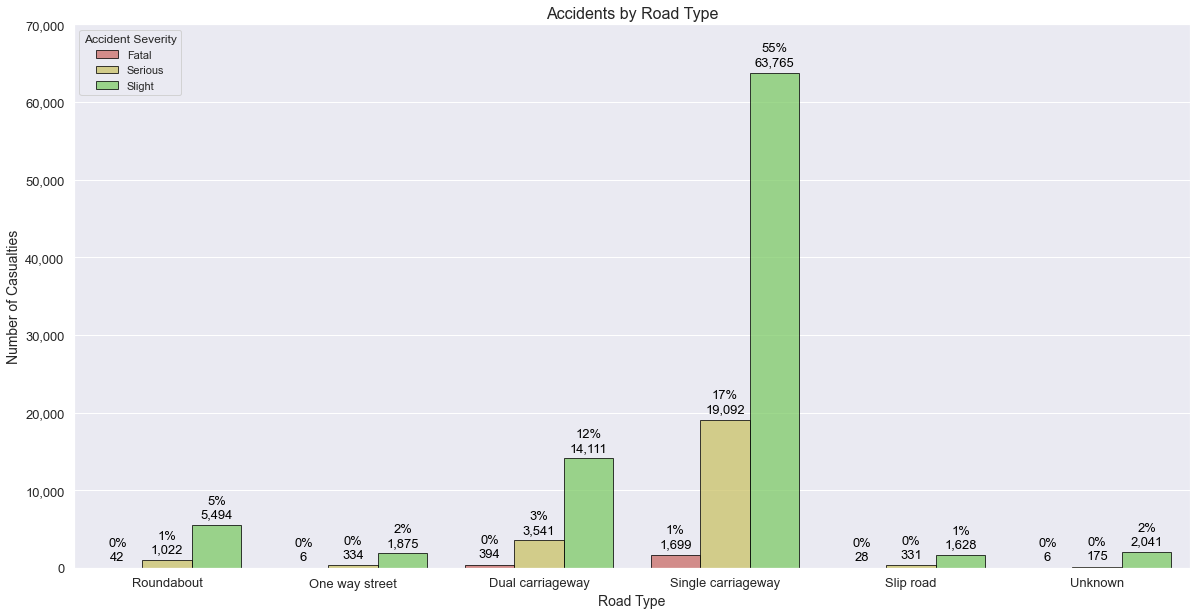

In [39]:
# Create Dataframe
roadtype_accidents = data_df.groupby(['road_type',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = roadcond_accidents['number_of_casualties'].sum()

# 
roadtype_accidents['road_type'] = [str('Roundabout') if value==1 else str('One way street') if value==2 else str('Dual carriageway') if value==3 else str('Single carriageway') if value==6 else str('Slip road') if value==7 else str('One way street/Slip road') if value==12 else str('Unknown')
                                         for value in roadtype_accidents['road_type']]

plt.figure(figsize=(20,10))

# Determine y-axis
y_max = max(roadtype_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='road_type', y='number_of_casualties', hue='accident_severity', data=roadtype_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents by Road Type', fontsize=16)
plt.show()

### Junction Detail
Most of the severe accidents does not happen at a junction or within 20 meters from a junction, even if there is still some amounts of accidents happening at a T or staggered junction there is pretty much no difference between major and non-major accidents.

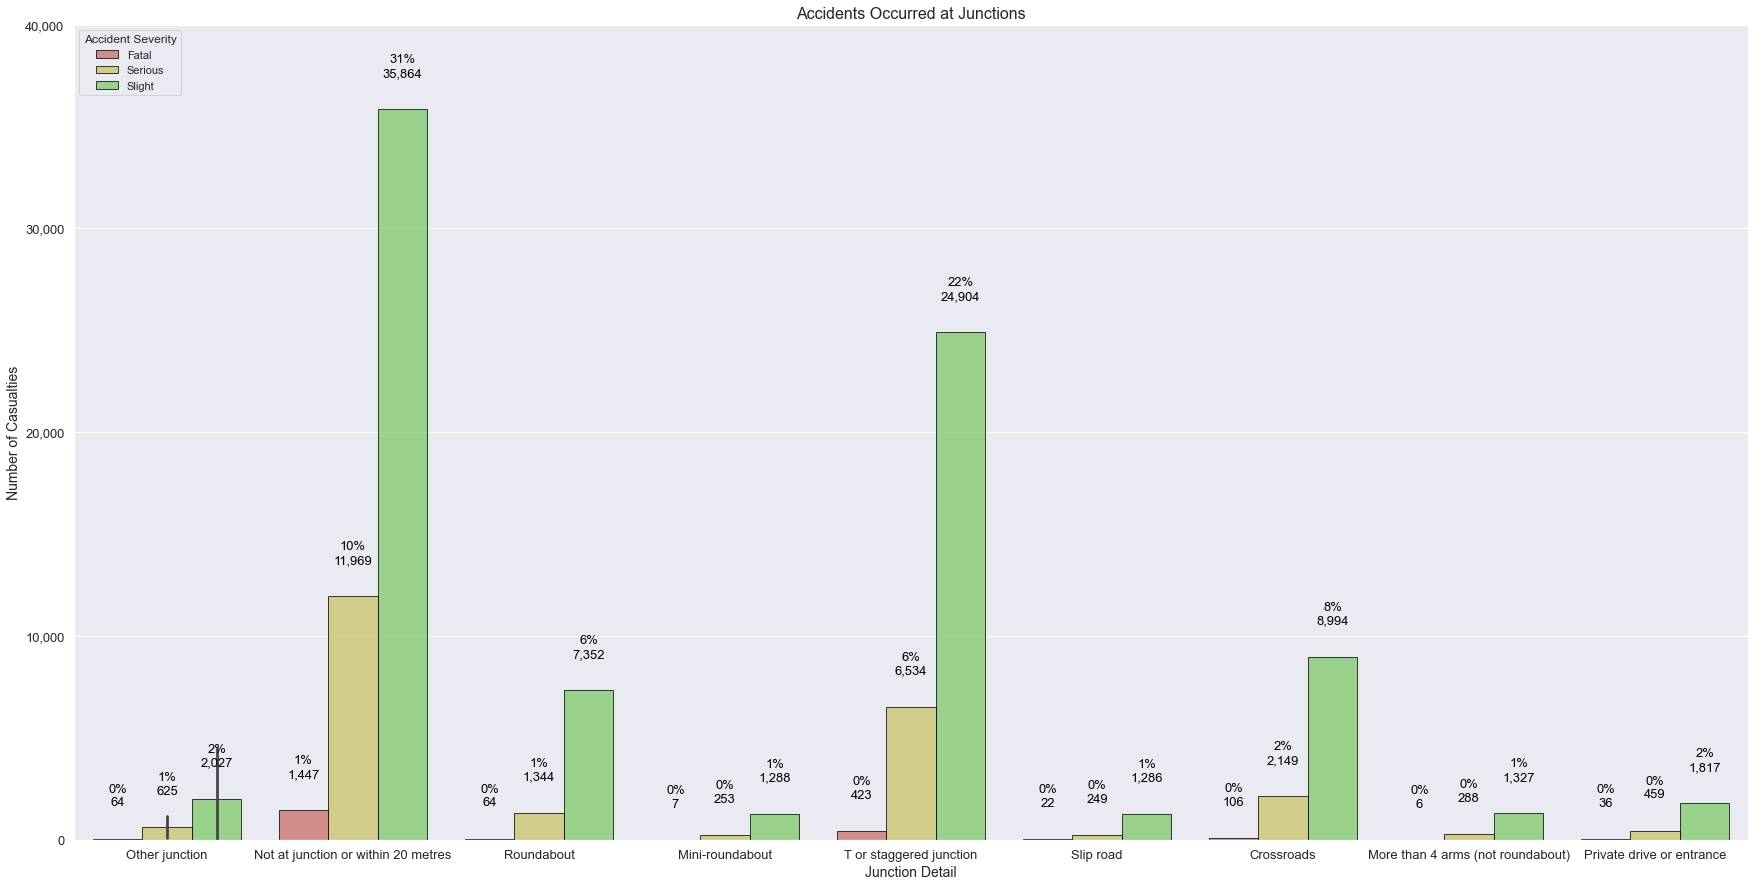

In [40]:
# Create Dataframe
junction_accidents = data_df.groupby(['junction_detail',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = junction_accidents['number_of_casualties'].sum()

# 
junction_accidents['junction_detail'] = [str('Not at junction or within 20 metres') if value==0 else str('Roundabout') if value==1 else str('Mini-roundabout') if value==2 else str('T or staggered junction') if value==3 else str('Slip road') if value==5 else str('Crossroads') if value==6 else str('More than 4 arms (not roundabout)') if value==7 else str('Private drive or entrance') if value==8 else str('Other junction')
                                         for value in junction_accidents['junction_detail']]

plt.figure(figsize=(30,15))

# Determine y-axis
y_max = max(junction_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='junction_detail', y='number_of_casualties', hue='accident_severity', data=junction_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('Junction Detail', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents Occurred at Junctions', fontsize=16)
plt.show()

### First Road Class
For the statal roads, we can see that most of the accidents appear to be happening on A road types since this type of roads can be single or dual carriageway, the precedently gathered data also show that most of the accidents happen on single carriageway so we can see how this is interconnected, but once more does not show any great difference between the type of accidents.

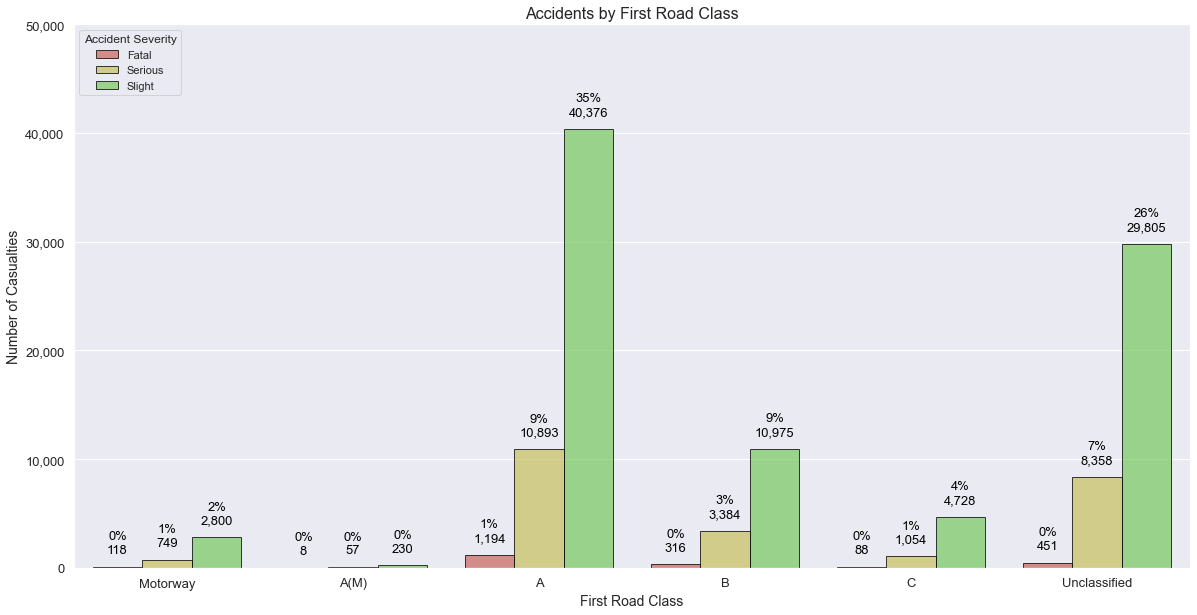

In [41]:
# Create Dataframe
road1st_accidents = data_df.groupby(['first_road_class',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = road1st_accidents['number_of_casualties'].sum()

# 
road1st_accidents['first_road_class'] = [str('Motorway') if value==1 else str('A(M)') if value==2 else str('A') if value==3 else str('B') if value==4 else str('C') if value==5 else str('Unclassified')
                                         for value in road1st_accidents['first_road_class']]

plt.figure(figsize=(20,10))

# Determine y-axis
y_max = max(road1st_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='first_road_class', y='number_of_casualties', hue='accident_severity', data=road1st_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('First Road Class', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents by First Road Class', fontsize=16)
plt.show()

### Second Road Class
For the regional roads, however, since most of the accidents are happening on statal roads, it is normal that the graph will provide us with unclassified data.

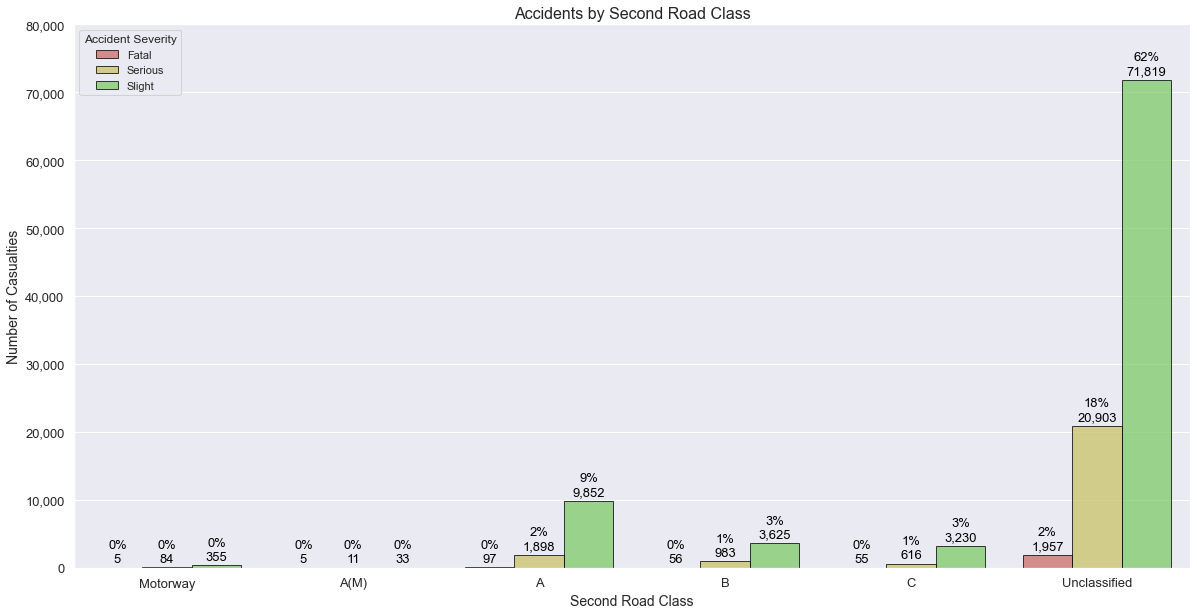

In [42]:
# Create Dataframe
road2nd_accidents = data_df.groupby(['second_road_class',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

total_casualties = road2nd_accidents['number_of_casualties'].sum()

# 
road2nd_accidents['second_road_class'] = [str('Not at junction or within 20 metres') if value==0  else str('Motorway') if value==1 else str('A(M)') if value==2 else str('A') if value==3 else str('B') if value==4 else str('C') if value==5 else str('Unclassified')
                                         for value in road2nd_accidents['second_road_class']]

plt.figure(figsize=(20,10))

# Determine y-axis
y_max = max(road2nd_accidents['number_of_casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

g = sns.barplot(x='second_road_class', y='number_of_casualties', hue='accident_severity', data=road2nd_accidents, 
                palette=rainbow, linewidth=1, edgecolor='black', alpha=0.75)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  

plt.xlabel('Second Road Class', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.title('Accidents by Second Road Class', fontsize=16)
plt.show()

### Average Casualties Age
For our final case study of the various accidents characteristics, we can see that the average age for both sexes is around 36 years old, which is kinda normal since at that age is where we are less focused and more stressed, which leads to deconcentration while driving and excessive speed, now that we collected all this data we can draw some solid conclusions and try to prevent major accidents from occurring.

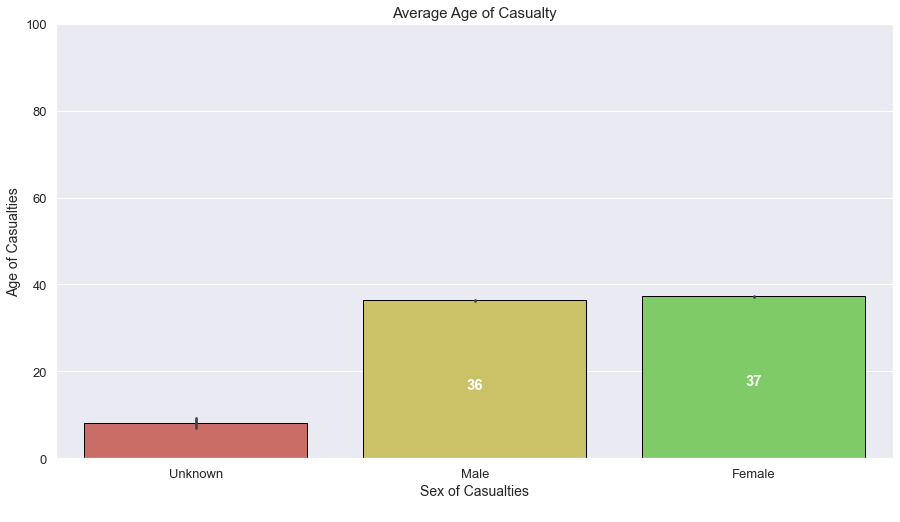

In [43]:
casualties_df=casualties_df[casualties_df.sex_of_casualty < 3]
# Show Values on Bars
plt.figure(figsize=(15,8))
b_values = sns.barplot(x='sex_of_casualty', y='age_of_casualty', data=casualties_df,
palette=rainbow, edgecolor='black', linewidth=1)
x_axis = np.arange(0,3,1)
# Calculate upper bound of y-axis
y_max = max(casualties_df['age_of_casualty'])
y_max -= y_max % -100
step = 20
y_axis = np.arange(0, y_max+step, step)
y_axis_fmt = ["{:.0f}".format(y) for y in y_axis]
plt.ylim(min(y_axis), max(y_axis))
plt.xticks(x_axis, ('Unknown','Male','Female'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

# Add Data Labels for bar values
ax = b_values.axes
for p in ax.patches:
    ax.annotate(s="{:.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-20)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=15) 
    
plt.ylabel('Age of Casualties', fontsize=14)
plt.xlabel('Sex of Casualties', fontsize=14)
plt.title('Average Age of Casualty', fontsize=15)
plt.show()

# 💡 Recommendations
Since as seen from the analysis major accidents are focusing for the biggest part in rural areas, it is a good starting point to brainstorm measures to reduce accidents around this information, rural areas could benefit from little things such as road improvements, signs and speed limits, there is much that can be done in this kind of area.
This data can also be filtered by geolocalising and drawing a map with major areas of focus using the given latitude and longitude to apply specific countermeasures as per zone in the UK, this way is possible to get a more general idea of why the accidents are really happening in that specific place.

<b>Based  on the analysis, here's some of the improvements that can be done:</b>

* <b>Single Carriageways Division</b> this is the most important as accidents tend to happen on this type of road, which usually have cars coming to both ways, it is a good idea to increase the distance between the opposing lanes or separate them to reduce the number of accidents.
* <b>More police force</b> can be applied to patrol specific zones on Saturday evening, applying more intoxication tests
* <b>Smart Traffic Lights, Road Demarcations, Signs</b> can be installed in rural areas
* <b>Speed Limiters and Lowering of the Speed Limit</b> as we have seen major accidents are all happening around a speed limit of 60Mph
* <b>Improving Lightning</b> we have seen that most of the accidents happen when there still was daylight but is always a nice idea to improve visibility since major accidents tend to happen in the evening.

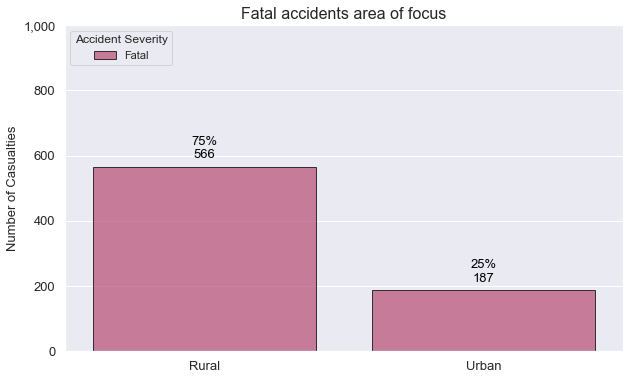

In [44]:
# Create Dataframe
area_road_type = major_accidents_df.groupby(['urban_or_rural_area',
                                     'road_type',
                                    'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()

# Convert Urban or Rural Area (1 or 2) raw data for respective area
area_road_type['urban_or_rural_area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in area_road_type['urban_or_rural_area']]
area_type = area_road_type.groupby(['urban_or_rural_area', 'accident_severity']).sum()['number_of_casualties'].to_frame().reset_index()
total_casualties = area_type['number_of_casualties'].sum()

road_type = area_road_type.groupby(['urban_or_rural_area', 'road_type']).sum()['number_of_casualties'].to_frame().reset_index()

urban_road = road_type.loc[road_type['urban_or_rural_area']=='Urban',:].sort_values('number_of_casualties', 
                                                                                    ascending=False)
rural_road = road_type.loc[road_type['urban_or_rural_area']=='Rural',:].sort_values('number_of_casualties', 
                                                                                    ascending=False)
plt.figure(figsize=(10,6))
g = sns.barplot(x='urban_or_rural_area', y='number_of_casualties', hue='accident_severity', data=area_type, 
                palette="plasma", linewidth=1, edgecolor='black', alpha=0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(area_type['number_of_casualties'])
y_max -= y_max % -1000
step = 200
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('')


ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+50)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Fatal", "Serious", "Slight"], loc='upper left', title='Accident Severity', frameon=True)
plt.ylabel('Number of Casualties', fontsize=13)
plt.title('Fatal accidents area of focus', fontsize=16)
plt.show()

# ♟️ Conclusions
We found out how there are some patterns in the major accidents and how they are slightly different from all other accidents, we defined a day of the week and a time frame in which those are occurring, as well as exploring the different characteristics, finally leading this analysis to solid conclusions where different measures can be applied to prevent major and non-major accidents in the UK, given the information we can tell that there is certainly some difference between the type of accidents, preventing the major ones will also certainly help reduce accidents in general, all of this can also be prevented with simple measures some of them are not even that expensive, such as applying proper road demarcations or by renewing them.
